# Birds in the Western Ghats area

### The broader goals for this Kaggle competition include:

##### (1) Identify endemic bird species of the sky-islands of the Western Ghats in soundscape data.

##### (2) Detect/classify endangered bird species (species of conservation concern) featuring limited training data.

##### (3) Detect/classify nocturnal bird species which are poorly understood.

### Custom Rectangle as the Western Ghats area
* [7.475, 20.431] Latitude
* [71.763, 78.574] Longitude

In [1]:
lat0,lat1=7.475, 20.431
lon0,lon1=71.763, 78.574

In [2]:
import os
import numpy as np
import pandas as pd
import random
import folium
from folium import plugins
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import IPython
import time
import plotly.express as px
from branca.colormap import linear
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython.core.display')


In [3]:
eq_map = folium.Map(location=[(lat0+lat1)/2,(lon0+lon1)/2],tiles='OpenStreetMap',zoom_start=5.0,min_zoom=2.0)
rectangle = folium.Rectangle(bounds=[(lat0,lon0),(lat1, lon1)], fill=True, color='red', fill_opacity=0.2)
eq_map.add_child(rectangle)
eq_map

In [4]:
data=pd.read_csv('/kaggle/input/birdclef-2024/train_metadata.csv')
print(data.columns.tolist())
print(data[0:2].T)

['primary_label', 'secondary_labels', 'type', 'latitude', 'longitude', 'scientific_name', 'common_name', 'author', 'license', 'rating', 'url', 'filename']
                                                                  0  \
primary_label                                                asbfly   
secondary_labels                                                 []   
type                                                       ['call']   
latitude                                                    39.2297   
longitude                                                  118.1987   
scientific_name                                  Muscicapa dauurica   
common_name                                  Asian Brown Flycatcher   
author                                               Matt Slaymaker   
license           Creative Commons Attribution-NonCommercial-Sha...   
rating                                                          5.0   
url                               https://www.xeno-canto.org/134

In [5]:
print(data['primary_label'].nunique())

182


In [6]:
data['latitude_inside']=data['latitude'].apply(lambda x: int(lat0<=x<=lat1))
data['longitude_inside']=data['longitude'].apply(lambda x: int(lon0<=x<=lon1))
data['both_inside']=data['latitude_inside']*data['longitude_inside']

I calculated the percentage within the designated area using data for each bird species. Species endemic to an area are thought to live concentrated in that area, so the percentage is estimated to be high.

In [7]:
data2=data[['primary_label','both_inside']]
display(data2)
data3=data2.groupby('primary_label', as_index=False)['both_inside'].agg(['mean','sum','size'])
data4=data3.sort_values('mean',ascending=False)[0:40]
display(data4)

,primary_label,both_inside
0,asbfly,0
1,asbfly,0
2,asbfly,0
3,asbfly,0
4,asbfly,1
...,...,...
24454,zitcis1,0
24455,zitcis1,0
24456,zitcis1,0
24457,zitcis1,0


,primary_label,mean,sum,size
118,nilfly2,1.000000,8,8
114,malwoo1,1.000000,10,10
112,malpar1,1.000000,20,20
49,crfbar1,1.000000,13,13
165,wbbfly1,1.000000,7,7
99,kerlau2,1.000000,14,14
173,whcbar1,0.982143,55,56
68,grejun2,0.960784,49,51
11,bkcbul1,0.958333,23,24
169,whbtre1,0.952381,20,21


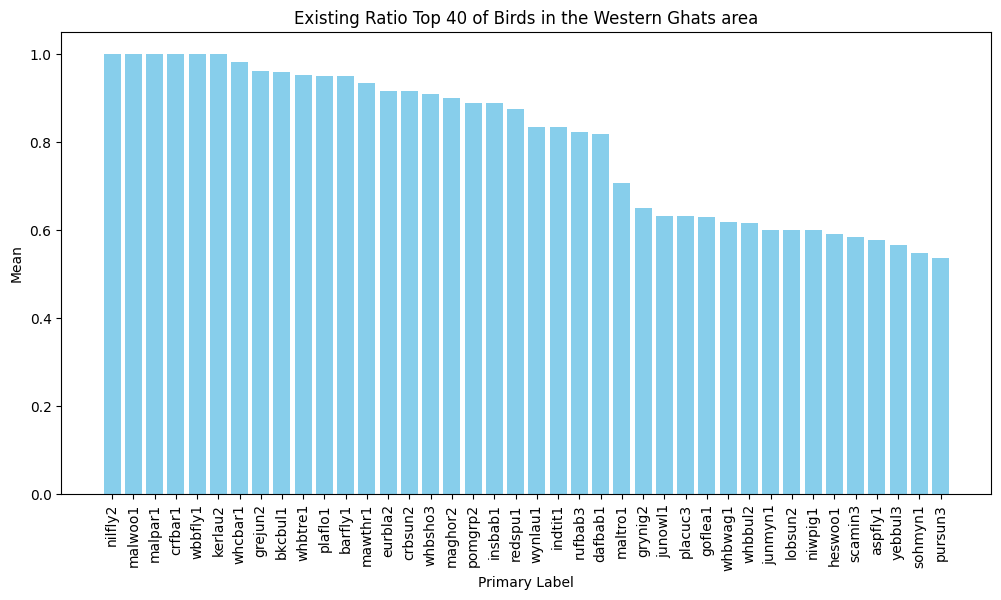

In [8]:
df=data4
plt.figure(figsize=(12, 6))
plt.bar(df['primary_label'], df['mean'], color='skyblue')
plt.title('Existing Ratio Top 40 of Birds in the Western Ghats area')
plt.xlabel('Primary Label')
plt.ylabel('Mean')
plt.xticks(rotation=90)
plt.show()